Project Analysis - Survey Satisfaction

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


In [13]:
# Load the Excel file
df = pd.read_excel('data1.xlsx', sheet_name='Data')

In [14]:
# Inspect the first few rows
df.head()

,index,family,years of service,management,colleagues,working environment,salary sat,work roles
0,1,1,22.0,3,3.0,3,3,3
1,2,2,10.0,1,5.0,2,1,3
2,3,1,7.0,3,4.0,1,1,3
3,4,2,14.0,3,3.0,3,3,3
4,5,1,4.0,2,3.0,2,1,2


In [15]:
# Get basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                82 non-null     int64  
 1   family               82 non-null     int64  
 2   years of service     80 non-null     float64
 3   management           82 non-null     int64  
 4   colleagues           81 non-null     float64
 5   working environment  82 non-null     int64  
 6   salary sat           82 non-null     int64  
 7   work roles           82 non-null     int64  
dtypes: float64(2), int64(6)
memory usage: 5.3 KB


In [16]:
df.isnull().sum()

index                  0
family                 0
years of service       2
management             0
colleagues             1
working environment    0
salary sat             0
work roles             0
dtype: int64

1. Background vairable analysis

In [17]:
# Edit table data
df.columns = ['id', 'family', 'years_of_service', 'sat_management', 'sat_colleagues', 'sat_work_env', 'sat_salary', 'sat_work_role']
df=df.drop(['id'], axis=1)
df.head()

,family,years_of_service,sat_management,sat_colleagues,sat_work_env,sat_salary,sat_work_role
0,1,22.0,3,3.0,3,3,3
1,2,10.0,1,5.0,2,1,3
2,1,7.0,3,4.0,1,1,3
3,2,14.0,3,3.0,3,3,3
4,1,4.0,2,3.0,2,1,2


In [18]:
df.describe()

,family,years_of_service,sat_management,sat_colleagues,sat_work_env,sat_salary,sat_work_role
count,82.000000,80.000000,82.000000,81.000000,82.000000,82.000000,82.000000
mean,1.621951,12.175000,3.060976,4.061728,3.219512,2.109756,3.195122
std,0.487884,8.807038,1.058155,0.826826,1.154961,1.111179,1.047502
min,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,1.000000,3.750000,2.000000,4.000000,3.000000,1.000000,3.000000
50%,2.000000,12.500000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,2.000000,18.250000,4.000000,5.000000,4.000000,3.000000,4.000000
max,2.000000,36.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [20]:
# Frequency and percentage table for 'family'
family_counts = df['family'].value_counts()
family_percentages = df['family'].value_counts(normalize=True) * 100

print("Frequency Table for 'family':")
print(family_counts)
print("\nPercentage Table for 'family':")
print(family_percentages)

Frequency Table for 'family':
family
2    51
1    31
Name: count, dtype: int64

Percentage Table for 'family':
family
2    62.195122
1    37.804878
Name: proportion, dtype: float64


In [51]:
grouped = df.groupby('family')['years_of_service'].describe()
grouped.index=['Has Family', 'No Family']

grouped


,count,mean,std,min,25%,50%,75%,max
Has Family,30.0,8.266667,7.459931,0.0,2.00,7.0,15.00,22.0
No Family,50.0,14.520000,8.783658,0.0,8.25,15.0,20.75,36.0


!!!!! Boxplot is made and interpreted (max 1 slide) !!!!! ----> What data are we representing here

BACKGROUND VARIABLES: 

2. Family (Categorical Variable)
Description: Family is a categorical variable indicating whether an employee is part of a family (1 = Yes, 2 = No)



In [28]:
# Frequency table for 'family'
family_counts = df['family'].value_counts()
print("Frequency Table for 'family':")
print(family_counts)

# Percentage table for 'family'
family_percentages = df['family'].value_counts(normalize=True) * 100
print("\nPercentage Table for 'family':")
print(family_percentages)

Frequency Table for 'family':
family
2    51
1    31
Name: count, dtype: int64

Percentage Table for 'family':
family
2    62.195122
1    37.804878
Name: proportion, dtype: float64


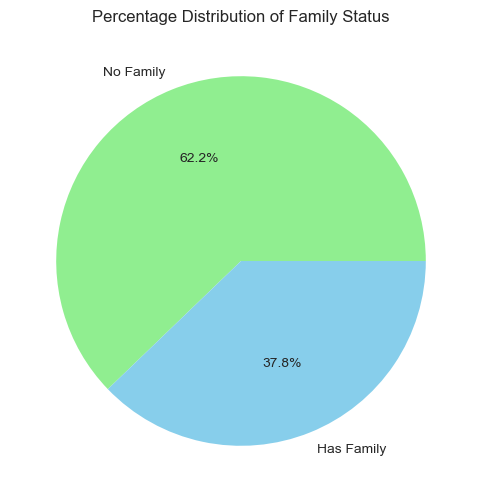

In [25]:
# Pie chart for 'family'
plt.figure(figsize=(6, 6))
plt.pie(family_percentages, labels=['No Family', 'Has Family'], autopct='%1.1f%%', colors=['lightgreen', 'skyblue'])
plt.title('Percentage Distribution of Family Status')
plt.show()

3. Years of Service (Numerical Variable)

Description: This variable represents the number of years an employee has worked at the company.

In [52]:
# Define bins and labels
bins = [0, 5, 10, 15, 20, float('inf')]
labels = ['0-5 years', '6-10 years', '11-15 years', '16-20 years', '21+ years']

# Create the service_category column with ordered categories
df['service_category'] = pd.cut(df['years_of_service'], bins=bins, labels=labels)
df['service_category'] = pd.Categorical(df['service_category'], categories=labels, ordered=True)

In [56]:
# Frequency table for service_category
service_counts = df['service_category'].value_counts(sort=False)  # sort=False keeps the original order
print("Frequency Table for 'service_category':")
print(service_counts)

# Percentage table for service_category
service_percentages = df['service_category'].value_counts(normalize=True, sort=False) * 100
print("\nPercentage Table for 'service_category':")
print(service_percentages)

Frequency Table for 'service_category':
service_category
0-5 years      18
6-10 years     16
11-15 years    11
16-20 years    15
21+ years      16
Name: count, dtype: int64

Percentage Table for 'service_category':
service_category
0-5 years      23.684211
6-10 years     21.052632
11-15 years    14.473684
16-20 years    19.736842
21+ years      21.052632
Name: proportion, dtype: float64


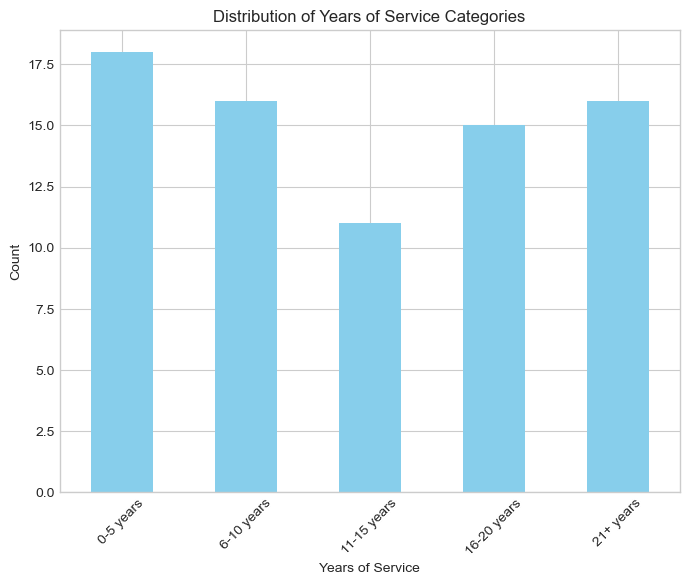

In [38]:
# Bar chart for service_category
plt.figure(figsize=(8, 6))
service_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Years of Service Categories')
plt.xlabel('Years of Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

4. Analyzing Variables in Pairs (family and years_of_service)

In [59]:
# Cross-tabulation of family and service_category
cross_tab = pd.crosstab(df['family'], df['service_category'])
cross_tab.index=['Has Family', 'No Family']
# Calculate row percentages
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

print("Cross-Tabulation of Family and Years of Service Categories:")
print(cross_tab)
print("\nRow Percentages:")
print(cross_tab_percent)

Cross-Tabulation of Family and Years of Service Categories:
service_category  0-5 years  6-10 years  11-15 years  16-20 years  21+ years
Has Family               11           8            2            4          3
No Family                 7           8            9           11         13

Row Percentages:
service_category  0-5 years  6-10 years  11-15 years  16-20 years  21+ years
Has Family        39.285714   28.571429     7.142857    14.285714  10.714286
No Family         14.583333   16.666667    18.750000    22.916667  27.083333


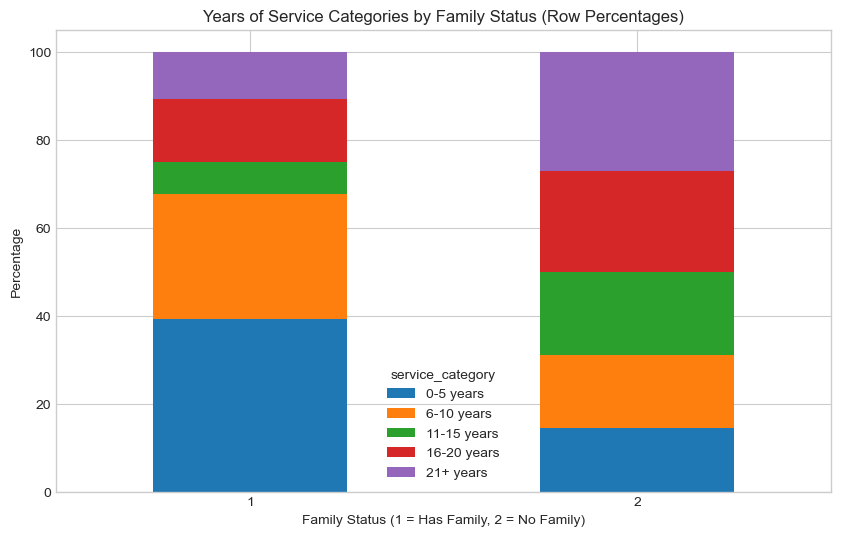

In [41]:
# Stacked bar chart for row percentages
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Years of Service Categories by Family Status (Row Percentages)')
plt.xlabel('Family Status (1 = Has Family, 2 = No Family)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

5. Statistical tests of numerical and categorical variables

In [42]:
from scipy.stats import chi2_contingency

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(cross_tab)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 10.311001382876382
P-value: 0.03550241388669458
Degrees of Freedom: 4
Expected Frequencies:
[[ 6.63157895  5.89473684  4.05263158  5.52631579  5.89473684]
 [11.36842105 10.10526316  6.94736842  9.47368421 10.10526316]]


Variable analysis (family, years_of_service) against Satisfaction Variables

The SAT variables in your dataset are:

- sat_management: Satisfaction with management.
- sat_colleagues: Satisfaction with colleagues.
- sat_work_env: Satisfaction with the working environment.
- sat_salary: Satisfaction with salary.
- sat_work_role: Satisfaction with work roles.

Frequency Crosstab for sat_management:
           Very dissatisfied  Dissatisfied  Neutral  Satisfied  Very satisfied
Family                     4             7       13          6               1
No Family                  3             9       17         17               5
--------------------------------
pvalue: 0.3761371786488699
--------------------------------
Percentage Crosstab for sat_management:
           Very dissatisfied  Dissatisfied    Neutral  Satisfied  Very satisfied
Family             12.903226     22.580645  41.935484  19.354839        3.225806
No Family           5.882353     17.647059  33.333333  33.333333        9.803922


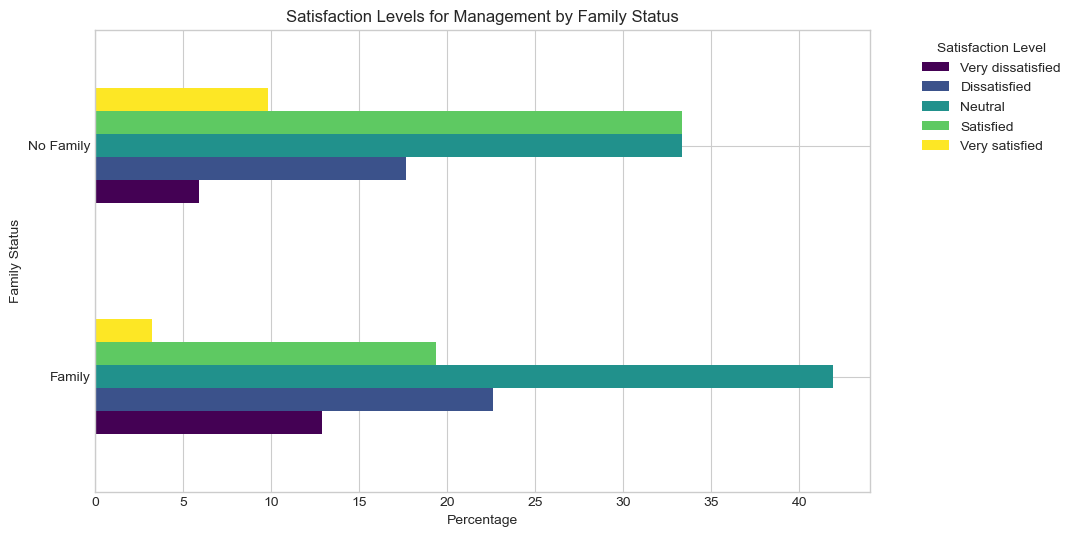

In [150]:
# Crosstab for sat_management
df_freq_fam_sat_management = pd.crosstab(df['family'], df['sat_management']) 

# Relabel rows and columns
df_freq_fam_sat_management.index = ['Family', 'No Family']
df_freq_fam_sat_management.columns = ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']

# Display the crosstab
print("Frequency Crosstab for sat_management:")
print(df_freq_fam_sat_management)

print('--------------------------------')
# CHI2 test for independence
print('pvalue:', chi2_contingency(df_freq_fam_sat_management).pvalue)
print('--------------------------------')

df_percents_fam_sat_management = df_freq_fam_sat_management.div(df_freq_fam_sat_management.sum(axis=1), axis=0) * 100
print('Percentage Crosstab for sat_management:')
print(df_percents_fam_sat_management)

# Plot bar chart
df_percents_fam_sat_management.plot(kind='barh', figsize=(10, 6), colormap='viridis')
plt.title('Satisfaction Levels for Management by Family Status')
plt.xlabel('Percentage')
plt.ylabel('Family Status')
plt.xticks(rotation=0)
plt.legend(title='Satisfaction Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Frequency Crosstab for sat_colleagues:
           Dissatisfied  Neutral  Satisfied  Very satisfied
Family                2        6         14               9
No Family             1       10         22              18
--------------------------------
pvalue: 0.7265096726662
--------------------------------
Percentage Crosstab for sat_colleagues:
           Dissatisfied    Neutral  Satisfied  Very satisfied
Family         6.451613  19.354839  45.161290       29.032258
No Family      1.960784  19.607843  43.137255       35.294118


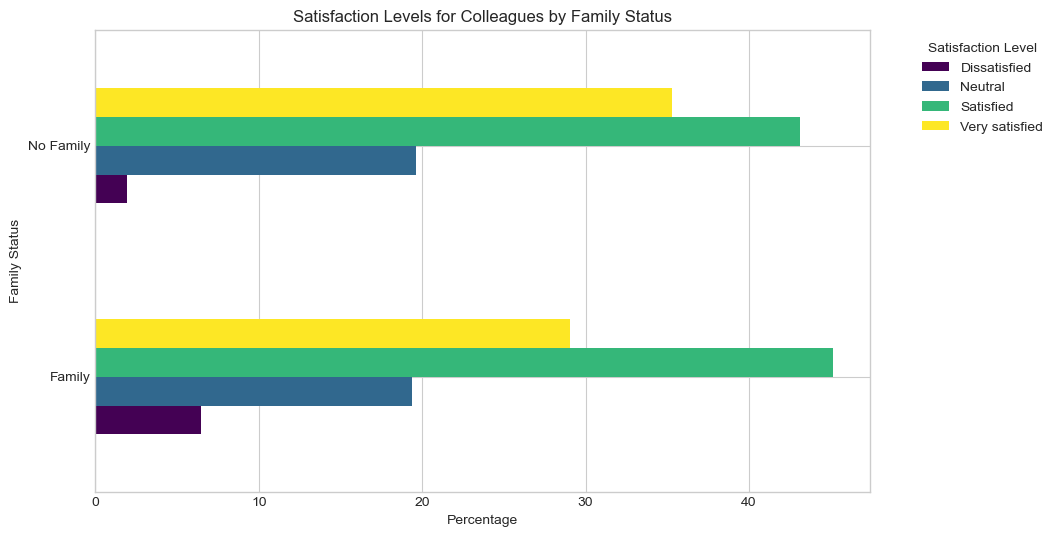

In [152]:
# print(df[['family', 'sat_colleagues']].isnull().sum())
# Drop rows with null values in 'sat_colleagues'
df_cleaned = df.dropna(subset=['sat_colleagues'])

# Verify that null values have been removed
# print(df_cleaned[['family', 'sat_colleagues']].isnull().sum())

# Crosstab for sat_colleagues 
df_freq_fam_sat_colleagues = pd.crosstab(df['family'], df['sat_colleagues']) 

# Relabel rows and columns
df_freq_fam_sat_colleagues.index = ['Family', 'No Family']
df_freq_fam_sat_colleagues.columns = ['Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']

# Display the crosstab
print("Frequency Crosstab for sat_colleagues:")
print(df_freq_fam_sat_colleagues)

print('--------------------------------')
# CHI2 test for independence
print('pvalue:', chi2_contingency(df_freq_fam_sat_colleagues).pvalue)
print('--------------------------------')

df_percents_fam_sat_colleagues = df_freq_fam_sat_colleagues.div(df_freq_fam_sat_colleagues.sum(axis=1), axis=0) * 100
print('Percentage Crosstab for sat_colleagues:')
print(df_percents_fam_sat_colleagues)

# Plot bar chart
df_percents_fam_sat_colleagues.plot(kind='barh', figsize=(10, 6), colormap='viridis')
plt.title('Satisfaction Levels for Colleagues by Family Status')
plt.xlabel('Percentage')
plt.ylabel('Family Status')
plt.xticks(rotation=0)
plt.legend(title='Satisfaction Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Frequency Crosstab for sat_work_env:
           Very dissatisfied  Dissatisfied  Neutral  Satisfied  Very satisfied
Family                     5             4       15          6               1
No Family                  4             5       15         17              10
--------------------------------
pvalue: 0.07571884501720708
--------------------------------
Percentage Crosstab for sat_work_env:
           Very dissatisfied  Dissatisfied    Neutral  Satisfied  Very satisfied
Family             16.129032     12.903226  48.387097  19.354839        3.225806
No Family           7.843137      9.803922  29.411765  33.333333       19.607843


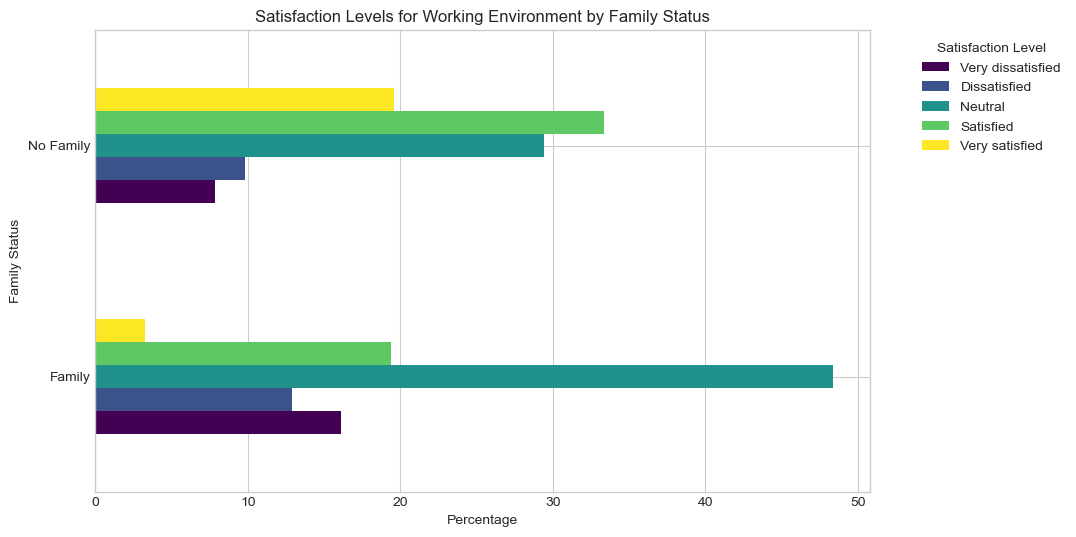

In [153]:
# Crosstab for sat_management
df_freq_fam_sat_working_env  = pd.crosstab(df['family'], df['sat_work_env']) 

# Relabel rows and columns
df_freq_fam_sat_working_env.index = ['Family', 'No Family']
df_freq_fam_sat_working_env.columns = ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']

# Display the crosstab
print("Frequency Crosstab for sat_work_env:")
print(df_freq_fam_sat_working_env)

print('--------------------------------')
# CHI2 test for independence
print('pvalue:', chi2_contingency(df_freq_fam_sat_working_env).pvalue)
print('--------------------------------')

df_percents_fam_sat_working_env = df_freq_fam_sat_working_env.div(df_freq_fam_sat_working_env.sum(axis=1), axis=0) * 100
print('Percentage Crosstab for sat_work_env:')
print(df_percents_fam_sat_working_env)

# Plot bar chart
df_percents_fam_sat_working_env.plot(kind='barh', figsize=(10, 6), colormap='viridis')
plt.title('Satisfaction Levels for Working Environment by Family Status')
plt.xlabel('Percentage')
plt.ylabel('Family Status')
plt.xticks(rotation=0)
plt.legend(title='Satisfaction Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Frequency Crosstab for sat_salary:
           Very dissatisfied  Dissatisfied  Neutral  Satisfied  Very satisfied
Family                    17             6        5          3               0
No Family                 16            13       14          7               1
--------------------------------
pvalue: 0.2993065167615921
--------------------------------
Percentage Crosstab for sat_salary:
           Very dissatisfied  Dissatisfied    Neutral  Satisfied  Very satisfied
Family             54.838710     19.354839  16.129032   9.677419        0.000000
No Family          31.372549     25.490196  27.450980  13.725490        1.960784


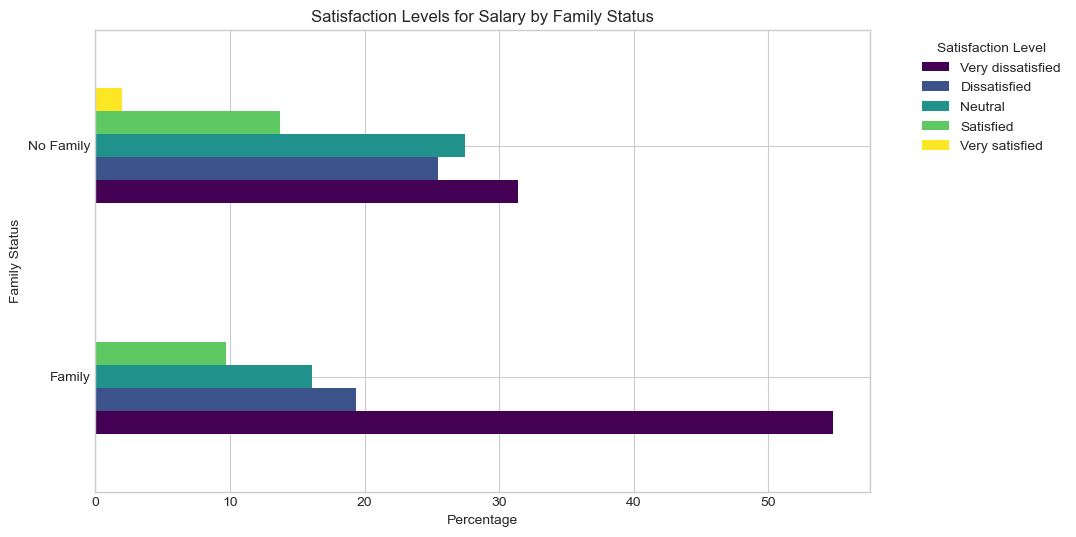

In [154]:
# Crosstab for sat_management
df_freq_fam_sat_salary = pd.crosstab(df['family'], df['sat_salary']) 

# Relabel rows and columns
df_freq_fam_sat_salary.index = ['Family', 'No Family']
df_freq_fam_sat_salary.columns = ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']

# Display the crosstab
print("Frequency Crosstab for sat_salary:")
print(df_freq_fam_sat_salary)

print('--------------------------------')
# CHI2 test for independence
print('pvalue:', chi2_contingency(df_freq_fam_sat_salary).pvalue)
print('--------------------------------')

df_percents_fam_sat_salary = df_freq_fam_sat_salary.div(df_freq_fam_sat_salary.sum(axis=1), axis=0) * 100
print('Percentage Crosstab for sat_salary:')
print(df_percents_fam_sat_salary)

# Plot bar chart
df_percents_fam_sat_salary.plot(kind='barh', figsize=(10, 6), colormap='viridis')
plt.title('Satisfaction Levels for Salary by Family Status')
plt.xlabel('Percentage')
plt.ylabel('Family Status')
plt.xticks(rotation=0)
plt.legend(title='Satisfaction Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Frequency Crosstab for sat_work_role:
           Very dissatisfied  Dissatisfied  Neutral  Satisfied  Very satisfied
Family                     3             9       13          4               2
No Family                  2             6       16         21               6
--------------------------------
pvalue: 0.0340357152085103
--------------------------------
Percentage Crosstab for sat_work_role:
           Very dissatisfied  Dissatisfied    Neutral  Satisfied  Very satisfied
Family              9.677419     29.032258  41.935484  12.903226        6.451613
No Family           3.921569     11.764706  31.372549  41.176471       11.764706


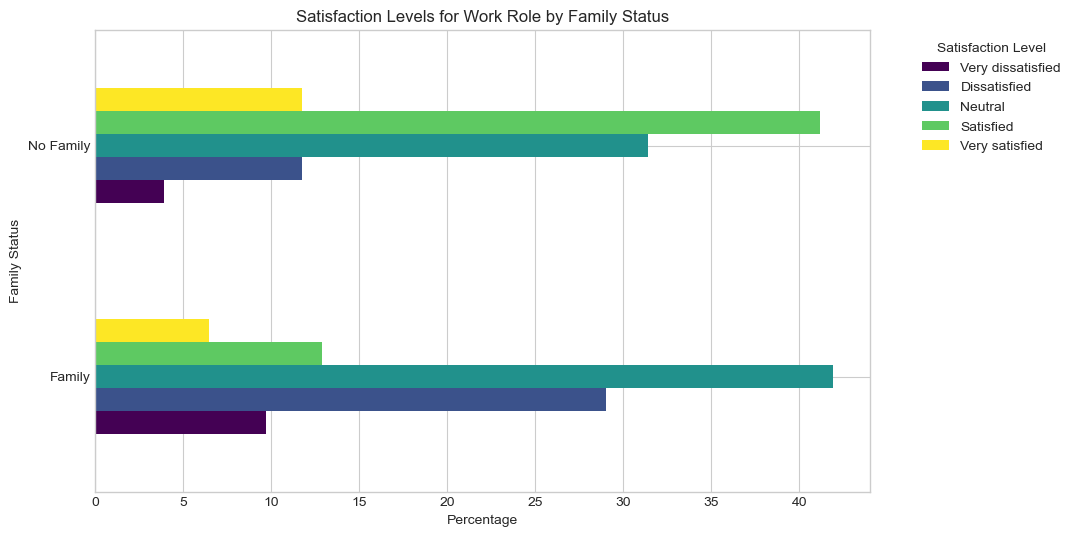

In [155]:
# Crosstab for sat_management
df_freq_fam_sat_work_role = pd.crosstab(df['family'], df['sat_work_role']) 

# Relabel rows and columns
df_freq_fam_sat_work_role.index = ['Family', 'No Family']
df_freq_fam_sat_work_role.columns = ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']

# Display the crosstab
print("Frequency Crosstab for sat_work_role:")
print(df_freq_fam_sat_work_role)

print('--------------------------------')
# CHI2 test for independence
print('pvalue:', chi2_contingency(df_freq_fam_sat_work_role).pvalue)
print('--------------------------------')

df_percents_fam_sat_work_role = df_freq_fam_sat_work_role.div(df_freq_fam_sat_work_role.sum(axis=1), axis=0) * 100
print('Percentage Crosstab for sat_work_role:')
print(df_percents_fam_sat_work_role)

# Plot bar chart
df_percents_fam_sat_work_role.plot(kind='barh', figsize=(10, 6), colormap='viridis')
plt.title('Satisfaction Levels for Work Role by Family Status')
plt.xlabel('Percentage')
plt.ylabel('Family Status')
plt.xticks(rotation=0)
plt.legend(title='Satisfaction Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Frequency Crosstab for sat_management:
                  Very dissatisfied  Dissatisfied  Neutral  Satisfied  Very satisfied
service_category                                                                     
0-5 years                         4             4        3          4               3
6-10 years                        1             2        8          5               0
11-15 years                       2             0        5          4               0
16-20 years                       0             4        5          3               3
21+ years                         0             3        8          5               0
--------------------------------
pvalue: 0.11494350037575846
--------------------------------
Percentage Crosstab for sat_management:
                  Very dissatisfied  Dissatisfied    Neutral  Satisfied  Very satisfied
service_category                                                                       
0-5 years                 22.222222     22.222222

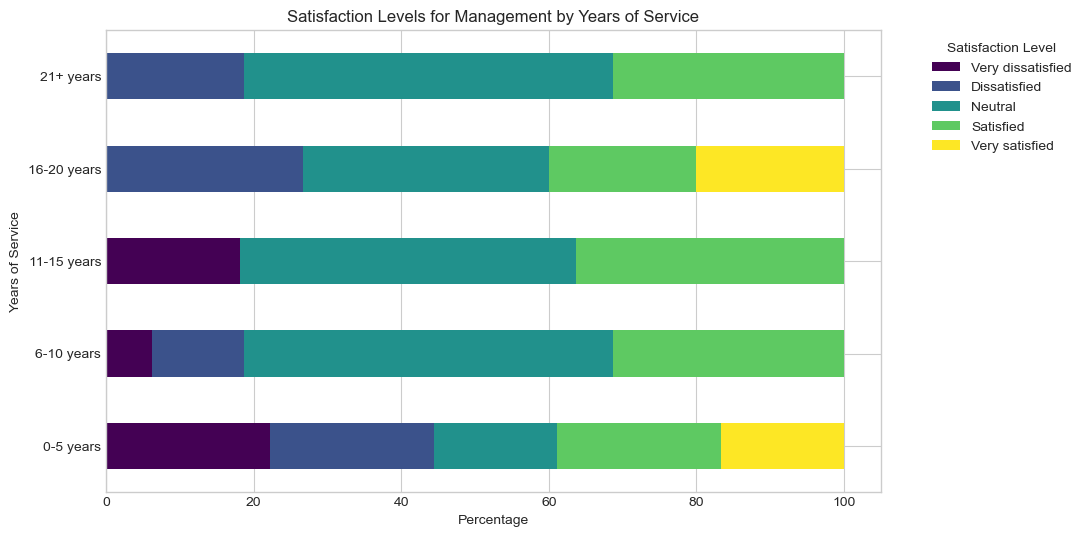

In [156]:
# Crosstab for sat_management
df_freq = pd.crosstab(df['service_category'], df['sat_management'])
df_percents = df_freq.div(df_freq.sum(axis=1), axis=0) * 100

# Relabel columns
df_percents.columns = ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
df_freq.columns = ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']

# Display the crosstab frequencies
print("Frequency Crosstab for sat_management:")
print(df_freq)

print('--------------------------------')
# CHI2 test for independence
print('pvalue:', chi2_contingency(df_freq).pvalue)
print('--------------------------------')

# Display the crosstab percentages
print("Percentage Crosstab for sat_management:")
print(df_percents)

# Plot bar chart
df_percents.plot(kind='barh', figsize=(10, 6), colormap='viridis', stacked=True)
plt.title('Satisfaction Levels for Management by Years of Service')
plt.xlabel('Percentage')
plt.ylabel('Years of Service')
plt.xticks(rotation=0)
plt.legend(title='Satisfaction Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [158]:
# print(df[['service_category', 'sat_colleagues']].isnull().sum())
# Fill missing values in 'sat_colleagues' with the mode
mode_sat_colleagues = df['sat_colleagues'].mode()[0]
df_filled = df.fillna({'sat_colleagues': mode_sat_colleagues})

# Verify that missing values have been filled
#print(df_filled[['service_category', 'sat_colleagues']].isnull().sum())

# Create crosstab with cleaned data
df_freq = pd.crosstab(df_cleaned['service_category'], df_cleaned['sat_colleagues'], dropna=False)

# Add missing columns if necessary
expected_columns = [1, 2, 3, 4, 5]  # Assuming 1=Very dissatisfied, 5=Very satisfied
for col in expected_columns:
    if col not in df_freq.columns:
        df_freq[col] = 0  # Add missing column with zero counts

# Sort columns to ensure correct order
df_freq = df_freq[expected_columns]

# Relabel columns dynamically
column_labels = {
    1: 'Very dissatisfied',
    2: 'Dissatisfied',
    3: 'Neutral',
    4: 'Satisfied',
    5: 'Very satisfied'
}
df_freq.columns = [column_labels[col] for col in df_freq.columns]

# Display the crosstab
print("Frequency Crosstab for sat_colleagues:")
print(df_freq)

print('--------------------------------')
# CHI2 test for independence
print('pvalue:', chi2_contingency(df_freq).pvalue)
print('--------------------------------')

# Calculate percentages
df_percents = df_freq.div(df_freq.sum(axis=1), axis=0) * 100


# Display the percentage crosstab
print("\nPercentage Crosstab for sat_colleagues:")
print(df_percents)

# Plot bar chart
df_percents.plot(kind='barh', figsize=(10, 6), colormap='viridis', stacked=True)
plt.title('Satisfaction Levels for Colleagues by Years of Service')
plt.xlabel('Percentage')
plt.ylabel('Years of Service')
plt.xticks(rotation=0)
plt.legend(title='Satisfaction Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Frequency Crosstab for sat_colleagues:
                  Very dissatisfied  Dissatisfied  Neutral  Satisfied  Very satisfied
service_category                                                                     
NaN                               0             0        2          3               1
0-5 years                         0             1        3          7               7
6-10 years                        0             0        3         10               3
11-15 years                       0             0        2          6               3
16-20 years                       0             2        2          4               7
21+ years                         0             0        4          6               6
--------------------------------


ValueError: The internally computed table of expected frequencies has a zero element at (0, 0).

Frequency Crosstab for sat_work_env:
                  Very dissatisfied  Dissatisfied  Neutral  Satisfied  Very satisfied
service_category                                                                     
0-5 years                         1             5        6          4               2
6-10 years                        1             2        9          3               1
11-15 years                       2             0        3          4               2
16-20 years                       3             0        2          5               5
21+ years                         0             2        7          6               1
--------------------------------
pvalue: 0.10736913104507592
--------------------------------
Percentage Crosstab for sat_work_env:
                  Very dissatisfied  Dissatisfied    Neutral  Satisfied  Very satisfied
service_category                                                                       
0-5 years                  5.555556     27.777778  33

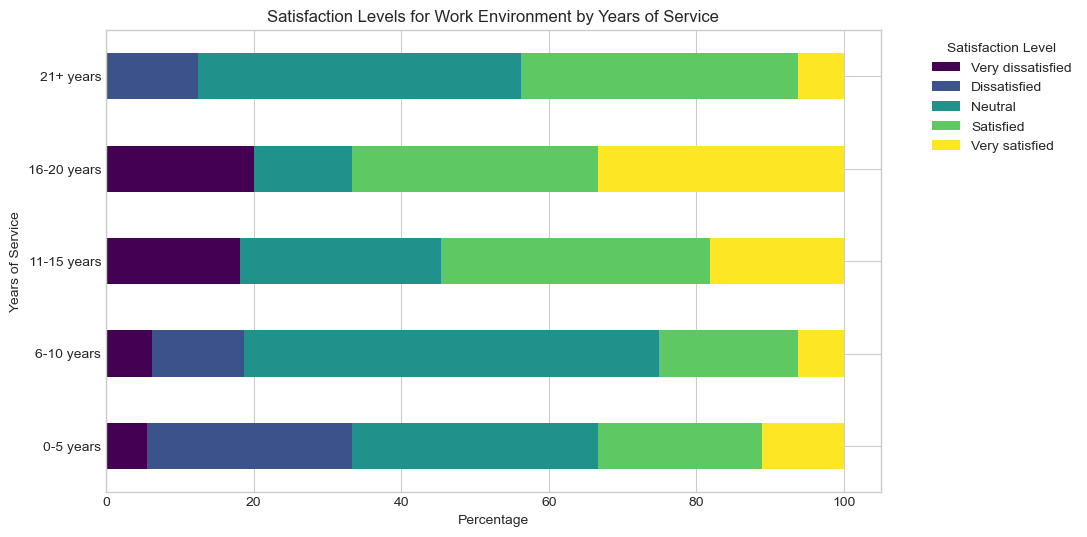

In [159]:
# Crosstab for sat_work_env
df_freq = pd.crosstab(df['service_category'], df['sat_work_env'])
df_percents = df_freq.div(df_freq.sum(axis=1), axis=0) * 100

# Relabel columns
df_percents.columns = ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
df_freq.columns = ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']

# Display the crosstab frequencies
print("Frequency Crosstab for sat_work_env:")
print(df_freq)

print('--------------------------------')
# CHI2 test for independence
print('pvalue:', chi2_contingency(df_freq).pvalue)
print('--------------------------------')

# Display the crosstab percentages
print("Percentage Crosstab for sat_work_env:")
print(df_percents)

# Plot bar chart
df_percents.plot(kind='barh', figsize=(10, 6), colormap='viridis', stacked=True)
plt.title('Satisfaction Levels for Work Environment by Years of Service')
plt.xlabel('Percentage')
plt.ylabel('Years of Service')
plt.xticks(rotation=0)
plt.legend(title='Satisfaction Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Frequency Crosstab for sat_salary:
                  Very dissatisfied  Dissatisfied  Neutral  Satisfied  Very satisfied
service_category                                                                     
0-5 years                         9             3        3          3               0
6-10 years                        6             4        4          2               0
11-15 years                       3             2        3          3               0
16-20 years                       5             5        3          1               1
21+ years                         7             4        4          1               0
--------------------------------
pvalue: 0.8786426749343974
--------------------------------
Percentage Crosstab for sat_salary:
                  Very dissatisfied  Dissatisfied    Neutral  Satisfied  Very satisfied
service_category                                                                       
0-5 years                 50.000000     16.666667  16.6666

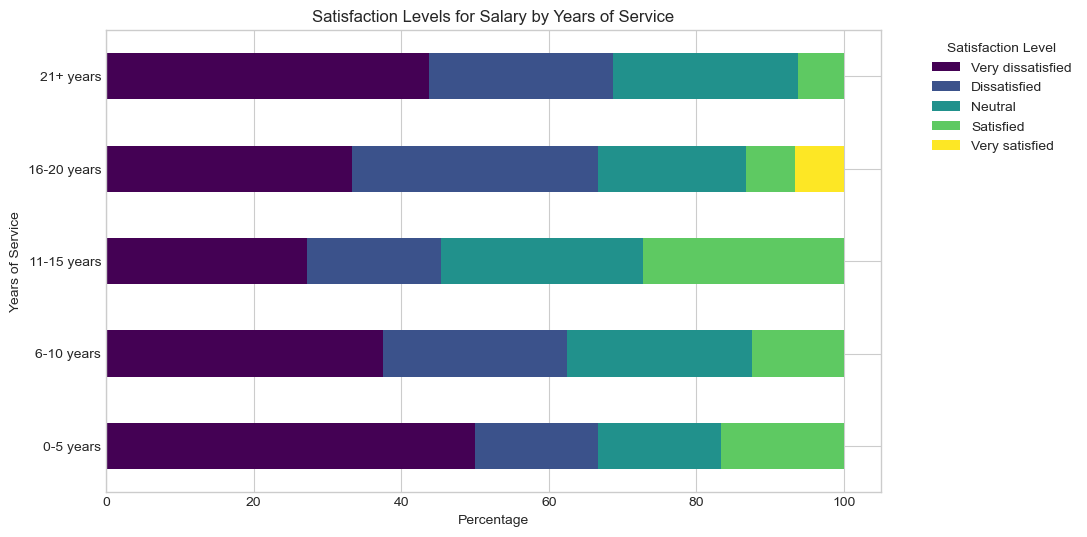

In [160]:
# Crosstab for sat_salary
df_freq = pd.crosstab(df['service_category'], df['sat_salary'])
df_percents = df_freq.div(df_freq.sum(axis=1), axis=0) * 100

# Relabel columns
df_percents.columns = ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
df_freq.columns = ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']

# Display the crosstab frequencies
print("Frequency Crosstab for sat_salary:")
print(df_freq)

print('--------------------------------')
# CHI2 test for independence
print('pvalue:', chi2_contingency(df_freq).pvalue)
print('--------------------------------')

# Display the crosstab percentages
print("Percentage Crosstab for sat_salary:")
print(df_percents)

# Plot bar chart
df_percents.plot(kind='barh', figsize=(10, 6), colormap='viridis', stacked=True)
plt.title('Satisfaction Levels for Salary by Years of Service')
plt.xlabel('Percentage')
plt.ylabel('Years of Service')
plt.xticks(rotation=0)
plt.legend(title='Satisfaction Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Crosstab for sat_work_role:
                  Very dissatisfied  Dissatisfied  Neutral  Satisfied  Very satisfied
service_category                                                                     
0-5 years                         2             4        6          5               1
6-10 years                        0             2        9          2               3
11-15 years                       1             2        1          7               0
16-20 years                       2             2        4          4               3
21+ years                         0             3        6          6               1
pvalue: 0.2679830546395781
Crosstab for sat_work_role:
                  Very dissatisfied  Dissatisfied    Neutral  Satisfied  Very satisfied
service_category                                                                       
0-5 years                 11.111111     22.222222  33.333333  27.777778        5.555556
6-10 years                 0.000000     12.500000  

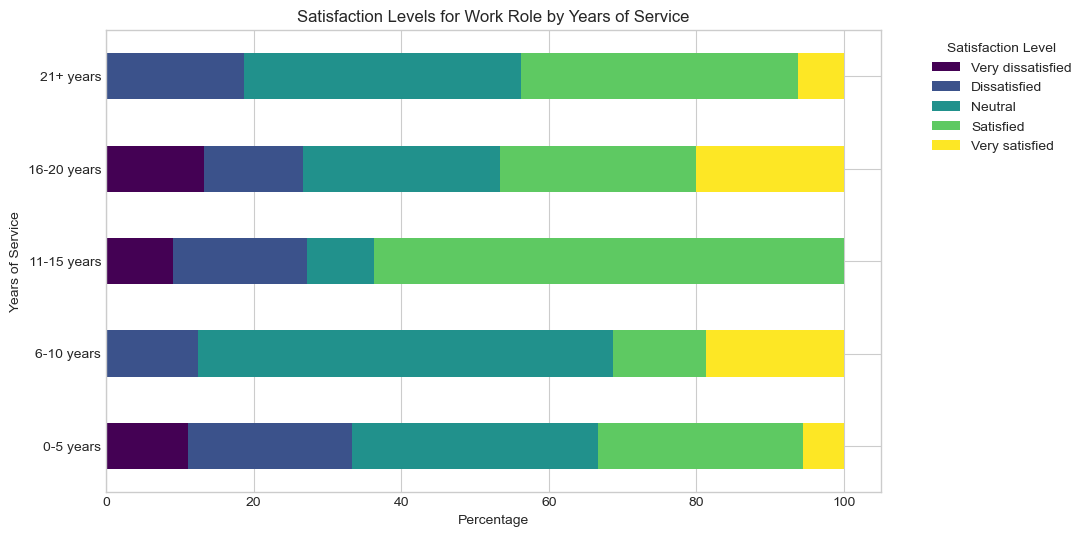

In [147]:
# Crosstab for sat_work_role
df_freq = pd.crosstab(df['service_category'], df['sat_work_role'])
df_percents = df_freq.div(df_freq.sum(axis=1), axis=0) * 100

# Relabel columns
df_percents.columns = ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
df_freq.columns = ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']

# Display the crosstab frequencies
print("Frequency Crosstab for sat_work_role:")
print(df_freq)

print('--------------------------------')
# CHI2 test for independence
print('pvalue:', chi2_contingency(df_freq).pvalue)
print('--------------------------------')

# Display the crosstab percentages
print("Percentage Crosstab for sat_work_role:")
print(df_percents)

# Plot bar chart
df_percents.plot(kind='barh', figsize=(10, 6), colormap='viridis', stacked=True)
plt.title('Satisfaction Levels for Work Role by Years of Service')
plt.xlabel('Percentage')
plt.ylabel('Years of Service')
plt.xticks(rotation=0)
plt.legend(title='Satisfaction Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()